# Part II: Exploratory Data Analysis

## Basic settings

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import sys
import warnings
from datetime import datetime, timedelta

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 50
pd.options.display.max_columns = None

In [18]:
DATA_DIR = "../data"
FIGURES_DIR = "../figures"

## Load preprocessed data

In [19]:
df_sales = pd.read_csv(
    os.path.join(DATA_DIR, "sales_data_preprocessed.csv"), parse_dates=["date"]
)

df_weather = pd.read_csv(
    os.path.join(DATA_DIR, "weather_preprocessed.csv"), parse_dates=["date"]
)

In [20]:
display(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201025 entries, 0 to 201024
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        201025 non-null  datetime64[ns]
 1   province    201025 non-null  object        
 2   store_id    201025 non-null  int64         
 3   store_name  201025 non-null  object        
 4   category    201025 non-null  object        
 5   item_id     201025 non-null  int64         
 6   item_name   201025 non-null  object        
 7   sales       201025 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 12.3+ MB


None

In [21]:
display(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   province     1462 non-null   object        
 1   date         1462 non-null   datetime64[ns]
 2   temperature  1462 non-null   float64       
 3   humidity     1462 non-null   float64       
 4   season       1462 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 57.2+ KB


None

## Perform EDA

### Basic Statistical Summary

In [23]:
print("BASIC STATISTICAL SUMMARY")

# Basic statistical summary
print("Summary Statistics of df_sales")
display(df_sales["sales"].describe())

print("Summary Statistics of df_weather")
display(df_weather[["temperature", "humidity"]].describe())

BASIC STATISTICAL SUMMARY
Summary Statistics of df_sales


count    201025.000000
mean         27.061438
std          19.497636
min           1.000000
25%          13.000000
50%          22.000000
75%          34.000000
max         107.000000
Name: sales, dtype: float64

Summary Statistics of df_weather


,temperature,humidity
count,1462.000000,1462.000000
mean,25.737688,79.957592
std,4.288278,7.416586
min,12.600000,62.000000
25%,24.300000,74.800000
50%,27.000000,80.100000
75%,28.600000,85.500000
max,33.400000,95.800000


In [25]:
# Check the date range of the 2 dataframes
print(
    f"\ndf_sales date range: {df_sales['date'].min()} to {df_sales['date'].max()}" 
)

print(
    f"\ndf_weather date range: {df_weather['date'].min()} to {df_weather['date'].max()}" 
)


df_sales date range: 2016-01-01 00:00:00 to 2017-12-31 00:00:00

df_weather date range: 2016-01-01 00:00:00 to 2017-12-31 00:00:00


In [28]:
# Count unique values
print(f"Number of unique stores: {df_sales['store_id'].nunique()}")
print(f"Number of unique items: {df_sales['item_id'].nunique()}")
print(f"Categories: {df_sales['category'].nunique()}")
print(f"Provinces: {df_sales['province'].nunique()}")
print(f"Seasons: {df_weather['season'].nunique()}")

Number of unique stores: 10
Number of unique items: 35
Categories: 5
Provinces: 2
Seasons: 6


In [29]:
save_figure = True

### Trend of Sales

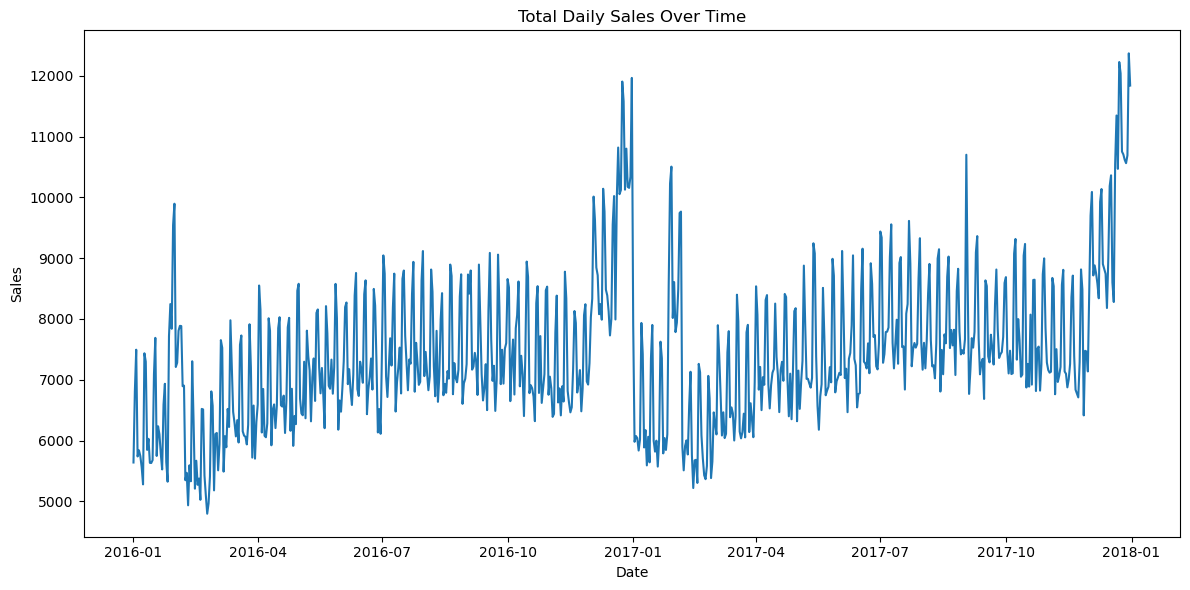

In [ ]:
plt.figure(figsize=(12, 6))
daily_df_sales = df_sales.groupby('date')['sales'].sum().reset_index()
plt.plot(daily_df_sales['date'], daily_df_sales['sales'])
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()

if save_figure:
    plt.savefig(os.path.join(FIGURES_DIR, "daily_sales_trend.png"))

### Average Sales by day of week


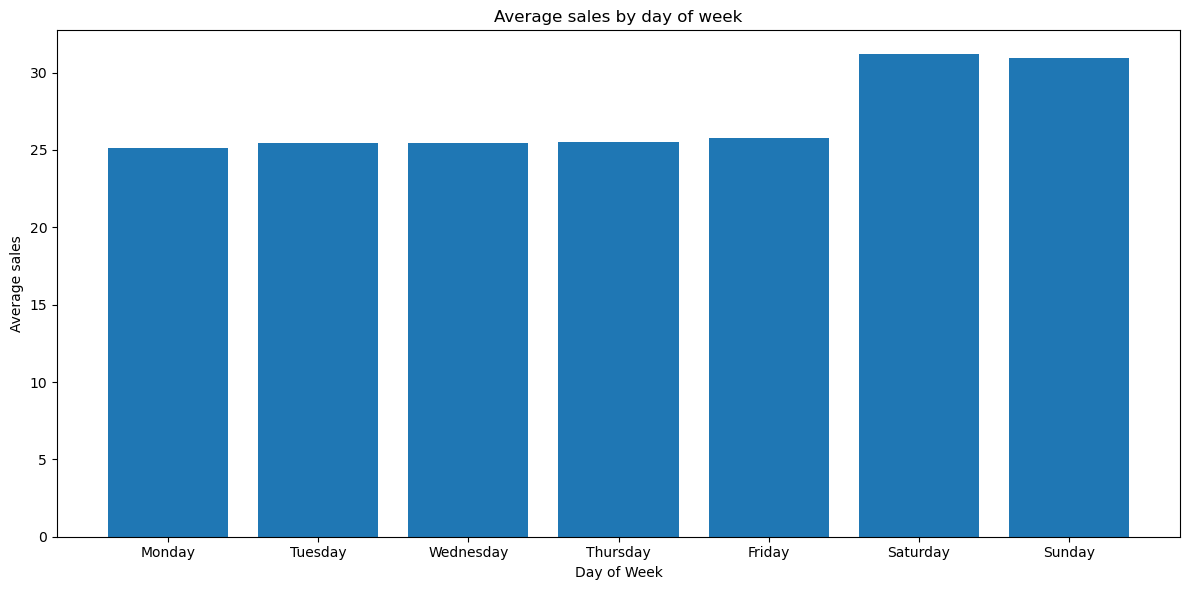

In [ ]:
plt.figure(figsize=(12, 6))
df_sales["day_of_week"] = df_sales["date"].dt.dayofweek
day_names = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday", 
    "Saturday",
    "Sunday"
]

df_sales_by_day = df_sales.groupby('day_of_week')['sales'].mean().reindex(range(7))
plt.bar(day_names, df_sales_by_day)
plt.title("Average sales by day of week")
plt.xlabel("Day of Week")
plt.ylabel("Average sales")
plt.tight_layout()

if save_figure:
    plt.savefig(os.path.join(FIGURES_DIR, "average_sales_day_of_week.png"))

### Total Sales by Category

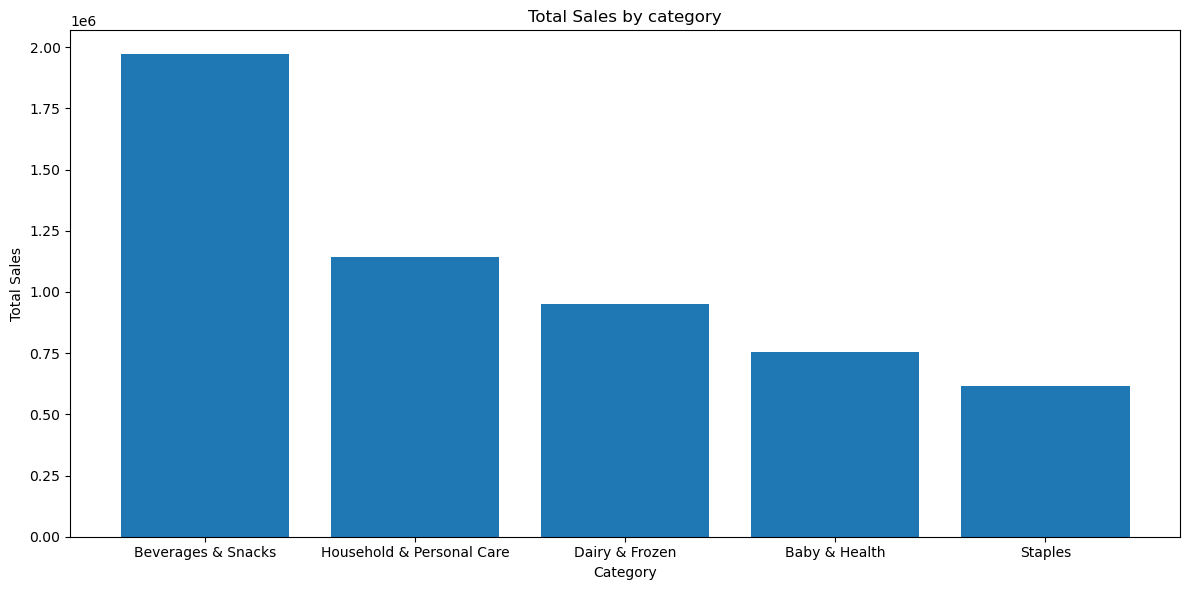

In [ ]:
category_sales = df_sales.groupby("category")['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(category_sales.index, category_sales.values)
plt.title("Total Sales by category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()

if save_figure:
    plt.savefig(os.path.join(FIGURES_DIR, "total_sales_category.png"))

### Correlation of temperature and sales


In [ ]:
# Create a sample by merging a subset of sales and weather
temperature_vs_sales = pd.merge(
    df_sales[['date', 'province', 'sales']]
    .groupby(['date', 'province'])
    .sum()
    .reset_index(),
    df_weather[['date', 'province', 'temperature']],
    on=['date', 'province']
)
temperature_vs_sales.head()

,date,province,sales,temperature
0,2016-01-01,Hanoi,2556.830014,13.4
1,2016-01-01,Ho Chi Minh City,3083.490041,27.6
2,2016-01-02,Hanoi,2942.415007,17.1
3,2016-01-02,Ho Chi Minh City,3865.830014,25.4
4,2016-01-03,Hanoi,3227.415007,18.3


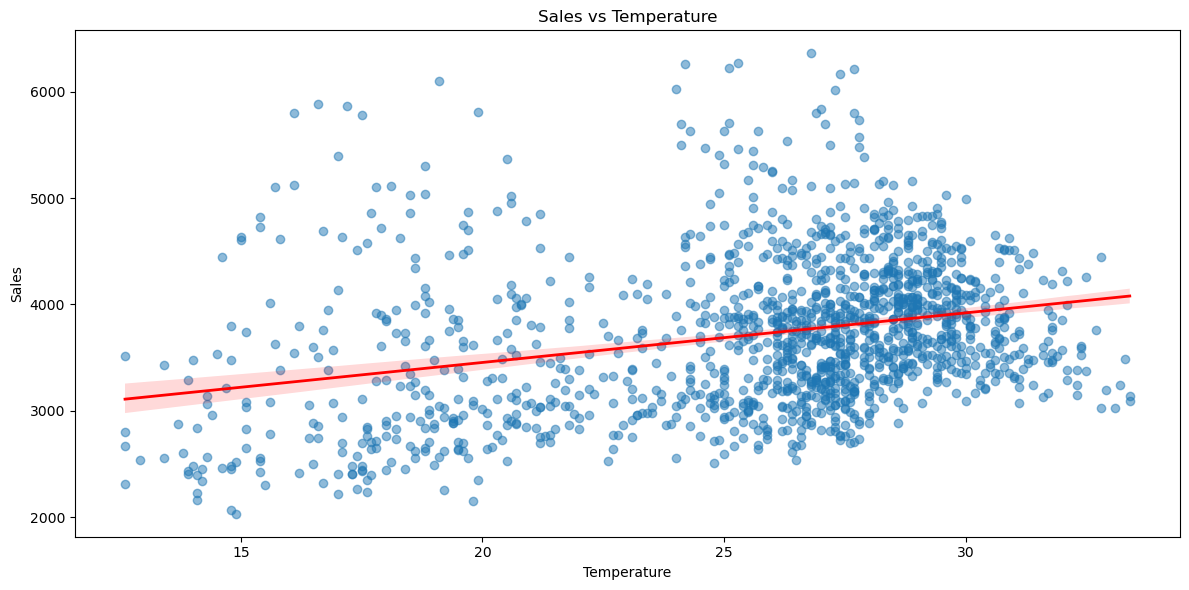

In [63]:
plt.figure(figsize=(12, 6))
# Scatter plot with regression line trend

sns.regplot(
    data=temperature_vs_sales, 
    x='temperature', 
    y='sales', 
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Sales vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.tight_layout()

if save_figure:
    plt.savefig(os.path.join(FIGURES_DIR, "sales_vs_temperature.png"))

### Correlation of humidity and sales


In [ ]:

# Create a sample by merging a subset of sales and weather
humidity_vs_sales = pd.merge(
    df_sales[['date', 'province', 'sales']]
    .groupby(['date', 'province'])
    .sum()
    .reset_index(),
    df_weather[['date', 'province', 'humidity']],
    on=['date', 'province']
)
humidity_vs_sales.head()

,date,province,sales,humidity
0,2016-01-01,Hanoi,2556.830014,88.4
1,2016-01-01,Ho Chi Minh City,3083.490041,77.1
2,2016-01-02,Hanoi,2942.415007,72.7
3,2016-01-02,Ho Chi Minh City,3865.830014,75.2
4,2016-01-03,Hanoi,3227.415007,71.1


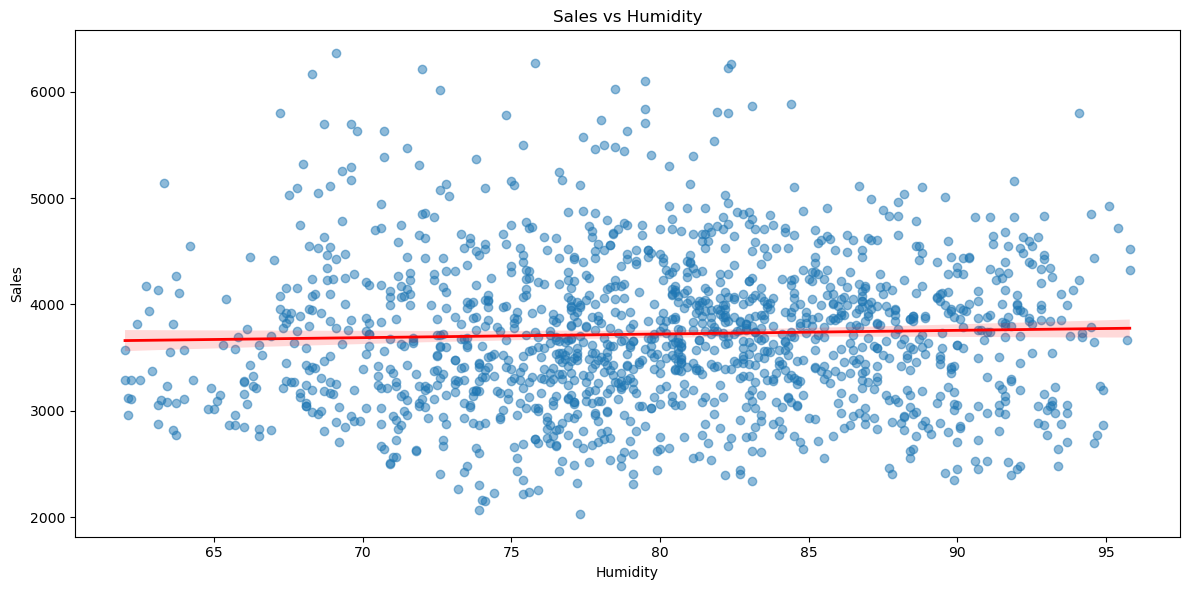

In [68]:
plt.figure(figsize=(12, 6))
# Scatter plot with regression line trend

sns.regplot(
    data=humidity_vs_sales, 
    x='humidity', 
    y='sales', 
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Sales vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Sales")
plt.tight_layout()

if save_figure:
    plt.savefig(os.path.join(FIGURES_DIR, "sales_vs_humidity.png"))

### Correlation of season and sales


In [ ]:
# Create a sample by merging a subset of sales and weather
season_vs_sales = pd.merge(
    df_sales[['date', 'province', 'sales']]
    .groupby(['date', 'province'])
    .sum()
    .reset_index(),
    df_weather[['date', 'province', 'season']],
    on=['date', 'province']
)
season_vs_sales.head()

,date,province,sales,season
0,2016-01-01,Hanoi,2556.830014,winter
1,2016-01-01,Ho Chi Minh City,3083.490041,dry
2,2016-01-02,Hanoi,2942.415007,winter
3,2016-01-02,Ho Chi Minh City,3865.830014,dry
4,2016-01-03,Hanoi,3227.415007,winter


In [103]:
new_season_vs_sales = season_vs_sales.copy()
new_season_vs_sales

,date,province,sales,season
0,2016-01-01,Hanoi,2556.830014,winter
1,2016-01-01,Ho Chi Minh City,3083.490041,dry
2,2016-01-02,Hanoi,2942.415007,winter
3,2016-01-02,Ho Chi Minh City,3865.830014,dry
4,2016-01-03,Hanoi,3227.415007,winter
...,...,...,...,...
1457,2017-12-29,Ho Chi Minh City,5292.055116,dry
1458,2017-12-30,Hanoi,6100.640109,winter
1459,2017-12-30,Ho Chi Minh City,6267.375171,dry
1460,2017-12-31,Hanoi,5810.470123,winter


In [101]:
province_values = season_vs_sales['province'].unique()
province_values

array(['Hanoi', 'Ho Chi Minh City'], dtype=object)

In [105]:
new_season_vs_sales[new_season_vs_sales['province'] == "Hanoi"]

,date,province,sales,season
0,2016-01-01,Hanoi,2556.830014,winter
2,2016-01-02,Hanoi,2942.415007,winter
4,2016-01-03,Hanoi,3227.415007,winter
6,2016-01-04,Hanoi,2554.415007,winter
8,2016-01-05,Hanoi,2765.415007,winter
...,...,...,...,...
1452,2017-12-27,Hanoi,4822.075034,winter
1454,2017-12-28,Hanoi,4724.905048,winter
1456,2017-12-29,Hanoi,5399.320055,winter
1458,2017-12-30,Hanoi,6100.640109,winter


In [122]:
province_season_sales_dict = {}
for province in province_values:
    province_season_sales_dict[province] = new_season_vs_sales[new_season_vs_sales['province'] == province]
type(province_season_sales_dict["Hanoi"])

pandas.core.frame.DataFrame

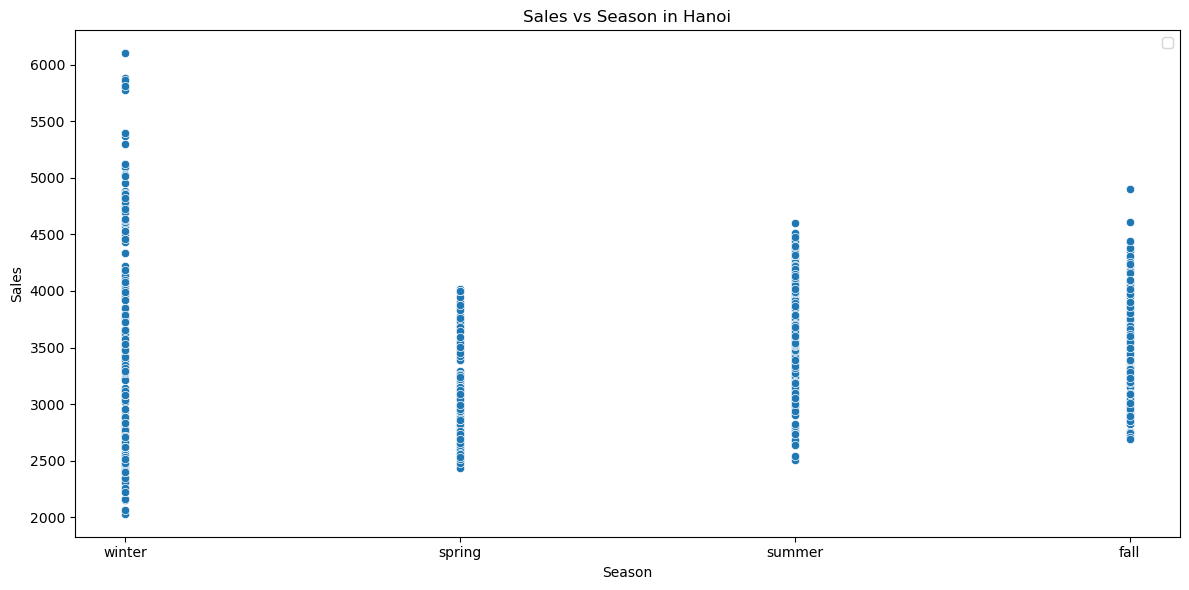

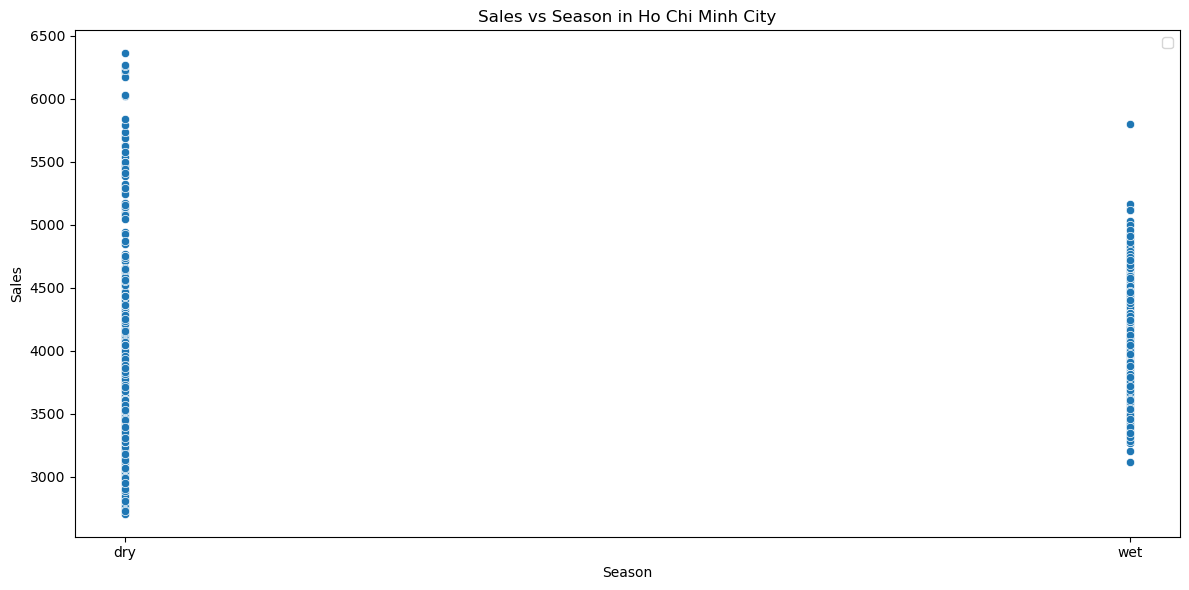

In [127]:
for province in province_values:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=province_season_sales_dict[province], 
        x='season', 
        y='sales'
    )
    
    plt.title(f"Sales vs Season in {province}")
    plt.xlabel("Season")
    plt.ylabel("Sales")
    plt.legend()
    plt.tight_layout()

    if save_figure:
        plt.savefig(os.path.join(FIGURES_DIR, f"sales_vs_season_in_{province}.png"))
    
